In [44]:
from scipy.fft import fft,rfft
import numpy as np

In [45]:
x = np.array([927.44093125,925.49461236,924.31948641,924.33762673,
       925.60201909,928.04900811,931.57537762,935.8550785 ,
       940.26126577,944.03708131,946.47991876,947.01414591,945.28666413,
       941.34667464,935.74179103,929.3730236 ,923.20325575,918.01552244,
       914.26248857,912.03415028,911.2143919 ,911.65268958,913.19815748,
       915.76223264,919.34358154,923.80653498,928.66724605,933.15272733,
       936.44177039,937.92965223,937.34842183,934.69186142,930.13642362,
       924.14579626,917.68492301,912.07659334,908.19535444,905.69622275])

In [46]:
y = rfft(x)

In [47]:
modulo1 = (abs(y))**2

In [48]:
total1 = np.sum(modulo1) - modulo1[0] #blazepose
total1

92961.84820485115

In [49]:
# Coefficient energy (%Et) of fundamental frequency blazepose
P1 = (modulo1[2]/total1)*100
P2 = (modulo1[1]/total1)*100
print("P1: %s\nP2: %s" % (str(P1), str(P2)))

P1: 71.61685340032764
P2: 14.35261308934685


In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

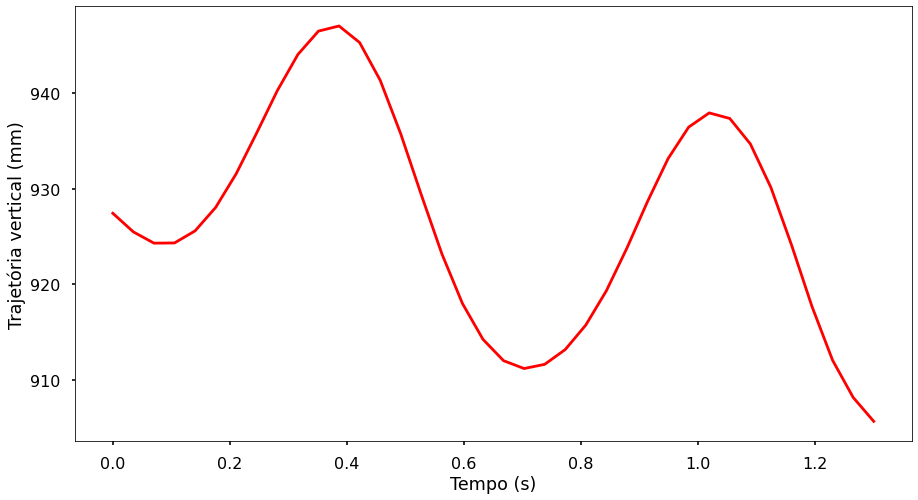

In [51]:
freq_amostragem = 29.21

t = np.linspace(0, len(x) / freq_amostragem, len(x))

plt.figure(figsize = (15, 8))
plt.plot(t, x, 'r')
plt.ylabel('Trajetória vertical (mm)')
plt.xlabel('Tempo (s)')

plt.show()

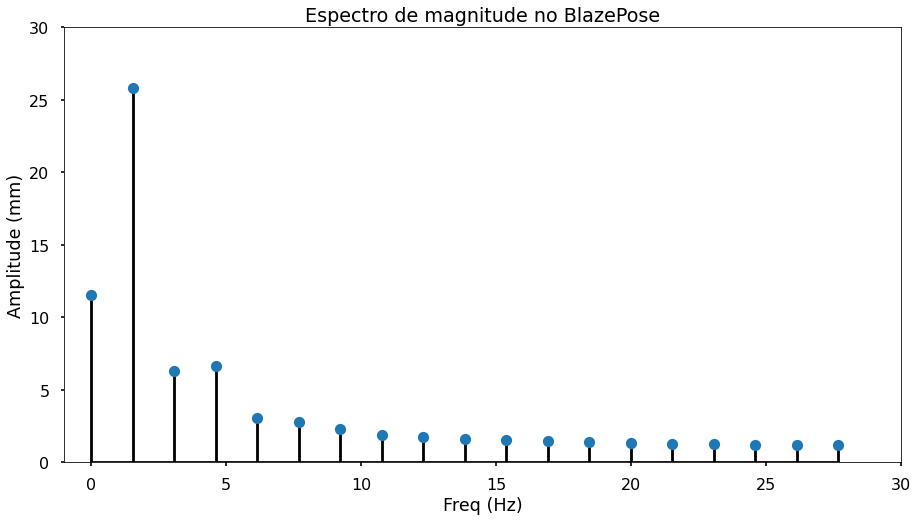

In [52]:
X = np.array([1.63727026e+01-114.34329453j,
       -2.55411594e+02 +36.62332541j,  3.35967996e+01 -53.43028693j,
        3.10209771e+01 -58.85500347j,  1.57922662e+01 -25.72631067j,
        1.60956788e+01 -22.58753331j,  1.45376491e+01 -17.25994087j,
        1.29464684e+01 -13.78382063j,  1.23837036e+01 -12.20804561j,
        1.21650186e+01 -10.5942486j ,  1.19367333e+01  -9.13459662j,
        1.19627240e+01  -7.69711307j,  1.19170672e+01  -6.40891049j,
        1.19339535e+01  -5.20769093j,  1.19300402e+01  -4.07868066j,
        1.19307087e+01  -3.01230381j,  1.19313403e+01  -1.98623393j,
        1.19319885e+01  -0.98675022j,  1.19322342e+01  +0.j              ])

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/freq_amostragem
freq = (n/T)

plt.figure(figsize = (15,8))
plt.stem(freq, 2*(abs(X))/(N+1), 'black', 
         markerfmt="o", basefmt="black")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (mm)')
plt.title('Espectro de magnitude no BlazePose')
plt.ylim(0, 30)
plt.xlim(-1, 30)
plt.show()

In [53]:
tempo = 1/freq[1]
print("P1: %s\nP2: %s\ntempo: %s s\nfrequência fundamental: %s Hz\nfreq inicial: %s" % (str(P1), str(P2),str(tempo), freq[1], freq[1]))

P1: 71.61685340032764
P2: 14.35261308934685
tempo: 0.6504621704895583 s
frequência fundamental: 1.5373684210526317 Hz
freq inicial: 1.5373684210526317


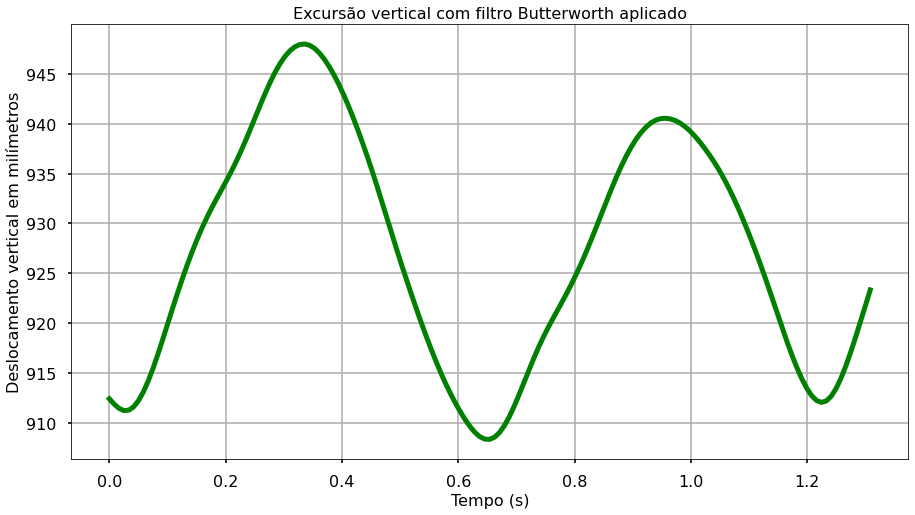

In [22]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

data = np.load('Comy mocap.npy')
freq_amostragem = 120

t = np.linspace(0, len(data) / freq_amostragem, len(data))

x, y = scipy.signal.butter(2, 0.225)
filteredy = scipy.signal.filtfilt(x, y, data, axis=0)

plt.figure(figsize=[15,8])
plt.plot(t, filteredy, color = 'g', linewidth = 5)
plt.ylabel('Deslocamento vertical em milímetros', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=16)
plt.title('Excursão vertical com filtro Butterworth aplicado', fontsize=16)
plt.grid()
plt.show()

In [23]:
y = rfft(filteredy)

In [24]:
modulo1 = (abs(y))**2

In [25]:
total1 = np.sum(modulo1) - modulo1[0]  #mocap
total1

1745219.6595535278

In [26]:
# Coefficient energy (%Et) of fundamental frequency mocap
P1 = (modulo1[2]/total1)*100
P2 = (modulo1[1]/total1)*100
print("P1: %s\nP2: %s" % (str(P1), str(P2)))

P1: 92.58571238365849
P2: 3.3291817265227537


In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

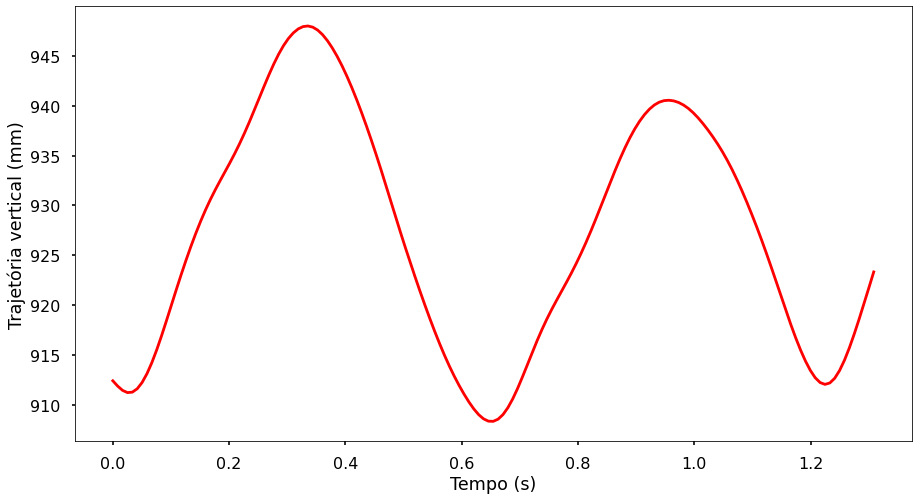

In [28]:
freq_amostragem = 120

t = np.linspace(0, len(filteredy) / freq_amostragem, len(filteredy))

plt.figure(figsize=[15,8])
plt.plot(t, filteredy, 'r')
plt.ylabel('Trajetória vertical (mm)')
plt.xlabel('Tempo (s)')

plt.show()

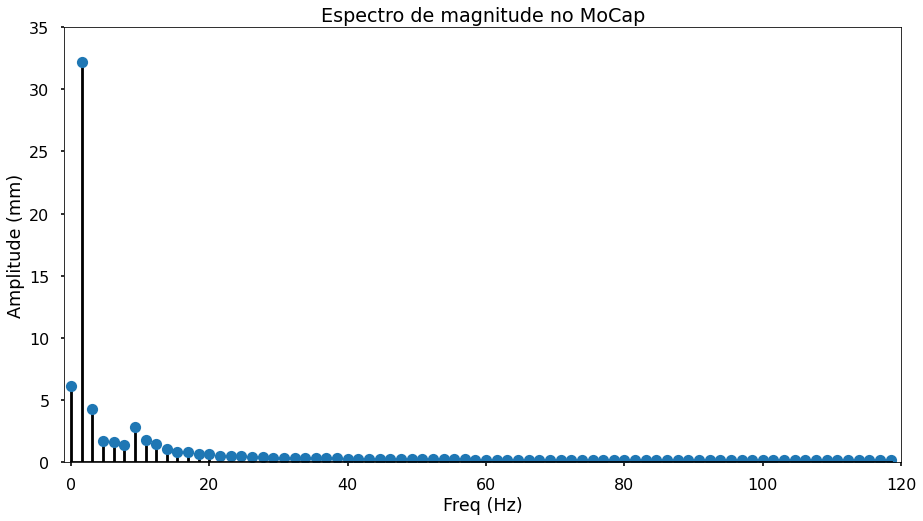

In [32]:
X = np.array([-1.16262324e+01-2.40762050e+02j,
       -1.25995269e+03-1.68354632e+02j,  1.57301953e+02+5.91349321e+01j,
        6.48937036e+01-1.88448077e+01j,  4.55527044e+01+4.46734853e+01j,
        1.36459838e+01+5.23634957e+01j,  6.39376362e+01+9.10821594e+01j,
        1.92140492e+01+6.71804463e+01j,  3.86786816e+01+4.28129330e+01j,
        7.68647089e+00+4.13742517e+01j,  1.09578034e+01+3.12692580e+01j,
        3.07007919e+00+3.25747060e+01j,  3.21538538e+00+2.53902816e+01j,
        1.38593504e+00+2.49138025e+01j,  1.68164834e+00+2.05361361e+01j,
       -5.99659552e-01+1.92629499e+01j, -1.15335390e+00+1.80286791e+01j,
       -1.94603520e+00+1.63850830e+01j, -2.10490569e+00+1.56555985e+01j,
       -2.07424473e+00+1.44291459e+01j, -2.58725603e+00+1.42058848e+01j,
       -2.93252679e+00+1.35827368e+01j, -3.12271031e+00+1.26937079e+01j,
       -3.44919351e+00+1.19528812e+01j, -3.74592511e+00+1.15919436e+01j,
       -3.95256618e+00+1.10214401e+01j, -4.17054782e+00+1.04053327e+01j,
       -4.22487473e+00+9.98582009e+00j, -4.44558654e+00+9.52675374e+00j,
       -4.53127409e+00+9.14532164e+00j, -4.58213110e+00+8.75862293e+00j,
       -4.70682729e+00+8.40200880e+00j, -4.79286009e+00+8.04442260e+00j,
       -4.87141447e+00+7.72848879e+00j, -4.93497962e+00+7.42937664e+00j,
       -4.99963497e+00+7.12621382e+00j, -5.04702695e+00+6.84479588e+00j,
       -5.09705495e+00+6.58420978e+00j, -5.13932659e+00+6.33467143e+00j,
       -5.19340159e+00+6.08112415e+00j, -5.22838260e+00+5.84018789e+00j,
       -5.27646935e+00+5.60858872e+00j, -5.30688331e+00+5.38993120e+00j,
       -5.34664034e+00+5.17499317e+00j, -5.37092576e+00+4.96797406e+00j,
       -5.39893773e+00+4.76581940e+00j, -5.42577656e+00+4.57110221e+00j,
       -5.45244714e+00+4.38084908e+00j, -5.47277886e+00+4.19658862e+00j,
       -5.49543021e+00+4.01842372e+00j, -5.51291763e+00+3.84244729e+00j,
       -5.53178929e+00+3.67287873e+00j, -5.54870380e+00+3.50741941e+00j,
       -5.56507086e+00+3.34407334e+00j, -5.57917508e+00+3.18471426e+00j,
       -5.59334750e+00+3.02887861e+00j, -5.60600893e+00+2.87537815e+00j,
       -5.61813295e+00+2.72487501e+00j, -5.62921116e+00+2.57702492e+00j,
       -5.63945862e+00+2.43162086e+00j, -5.64890000e+00+2.28840927e+00j,
       -5.65774814e+00+2.14736125e+00j, -5.66584932e+00+2.00813929e+00j,
       -5.67334993e+00+1.87080394e+00j, -5.68026944e+00+1.73505040e+00j,
       -5.68659845e+00+1.60076601e+00j, -5.69234064e+00+1.46785407e+00j,
       -5.69753035e+00+1.33622553e+00j, -5.70221050e+00+1.20568111e+00j,
       -5.70637042e+00+1.07613956e+00j, -5.71003069e+00+9.47483276e-01j,
       -5.71321018e+00+8.19608475e-01j, -5.71591755e+00+6.92397139e-01j,
       -5.71815878e+00+5.65747106e-01j, -5.71994260e+00+4.39554685e-01j,
       -5.72127540e+00+3.13716001e-01j, -5.72216151e+00+1.88129099e-01j,
       -5.72260385e+00+6.26929642e-02j])

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/freq_amostragem
freq = n/T

plt.figure(figsize = (15,8))
plt.stem((freq), 2*(abs(X))/(N+1), 'black', \
         markerfmt="o", basefmt="black")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (mm)')
plt.ylim(0, 35)
plt.xlim(-1, 120)
plt.title('Espectro de magnitude no MoCap')
plt.show()

In [33]:
tempo = 1/freq[1]
print("P1: %s\nP2: %s\ntempo: %s s\nfrequência fundamental: %s Hz\nfreq inicial: %s" % (str(P1), str(P2),str(tempo), freq[1], freq[0]))

P1: 92.58571238365849
P2: 3.3291817265227537
tempo: 0.65 s
frequência fundamental: 1.5384615384615383 Hz
freq inicial: 0.0
